# Linear Regression Code Preparation

Regression is a type of supervised machine learning algorithm used for predicting a **continuous output** variable (dependent variable or target variable) based on one or more input variables (independent variables or features). The goal of regression is to find the best-fitting line or curve that can predict the output variable as accurately as possible.

Mathematically, regression can be represented as a function that maps input variables (x) to an output variable (y). The function can take many forms, but the most common form is a linear function, represented as:

$$
y = w_1x_1 + w_2x_2 + ... + w_n*x_n + b
$$

where $w_1, w_2, ..., w_n$ are the weights or coefficients that determine the slope of the line, $x_1, x_2, ..., x_n$ are the input variables, and $b$ is the **bias** or **intercept** that determines where the line intersects the y-axis.

The **goal of regression** is to find the values of the weights and bias that minimize the difference between the predicted output and the actual output. This difference is known as the **error** or **residual**. The most common method for finding the best-fitting line is to use a technique called **least squares regression**, which minimizes the sum of the squared errors.

The **mathematical intuition** behind regression is to find the line or curve that best represents the relationship between the input variables and the output variable. This is done by adjusting the weights and bias to minimize the error between the predicted output and the actual output. The best-fitting line or curve is the one that has the smallest error or residual.

# Pipeline
**1. Build the Model** </br>
**2. Train the Model** </br>
**3. Make Predictions** </br>

## Build the Model

```python
# build linear regression model
model = nn.Linear(in_features=1, out_features=1)

Linear(in_features=1, out_features=1, bias=True)
```


## Train the Model

```python
# Loss
criterion = nn.MSELoss()

MSELoss()

# optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
```

### Gradient Descent Loop

```python
# train the model
EPOCHS = 30
for i in range(EPOCHS):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # back-propagate loss and optimize
    loss.backward()
    optimizer.step()
```

## Make Predictions


```python
# make predictions
predictions = model(inputs).detach().numpy()
```

# Linear Regression

In [15]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

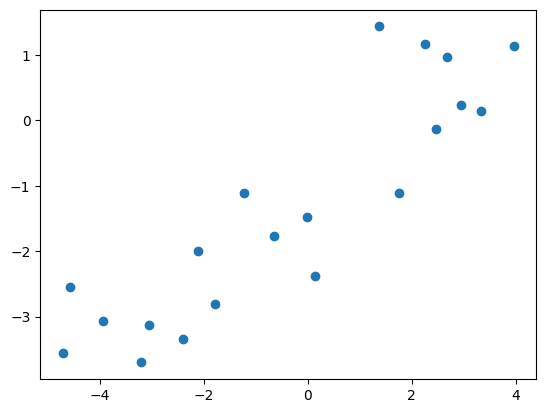

In [20]:
# generate 20 data points
N = 20

# random data on X-AXIS (-5, +5)
X = np.random.random(size=N) * 10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# plot the data
plt.scatter(x=X, y=Y)
plt.show()

In [27]:
# BUILD MODEL
model = nn.Linear(in_features=1, out_features=1)

# LOSS & OPTIMIZER
criterion:nn.MSELoss = nn.MSELoss()
optimizer:torch.optim.SGD = torch.optim.SGD(params=model.parameters(), lr=0.1)

X = X.reshape(N,1)
Y = Y.reshape(N,1)

# Numpy uses float64 & Torch uses float64, so convert
inputs = torch.from_numpy(X.astype(dtype=np.float32))
targets = torch.from_numpy(Y.astype(dtype=np.float32))

print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [34]:
# TRAIN MODEL
EPOCHS = 10
LOSSES = []

for i in range(EPOCHS):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # store the loss
    LOSSES.append(loss.item())

    # BACKPROPAGATE LOSS
    loss.backward()

    # OPTIMIZE
    optimizer.step()

    print(f"Epoch: {i+1}/{EPOCHS} | Loss: {loss}")


Epoch: 1/10 | Loss: 0.6017476916313171
Epoch: 2/10 | Loss: 0.6017476916313171
Epoch: 3/10 | Loss: 0.6017476916313171
Epoch: 4/10 | Loss: 0.6017476916313171
Epoch: 5/10 | Loss: 0.6017476916313171
Epoch: 6/10 | Loss: 0.6017476916313171
Epoch: 7/10 | Loss: 0.6017476916313171
Epoch: 8/10 | Loss: 0.6017476916313171
Epoch: 9/10 | Loss: 0.6017476916313171
Epoch: 10/10 | Loss: 0.6017476916313171


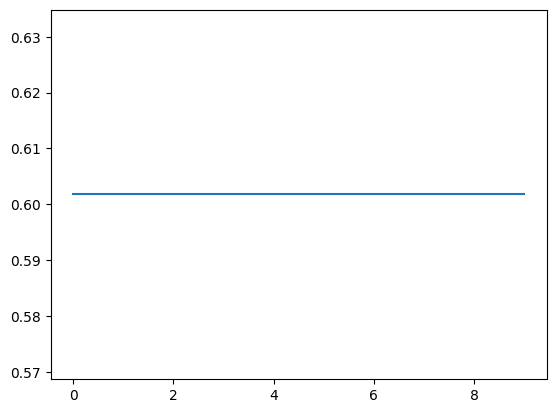

In [35]:
# plot the loss
plt.plot(LOSSES)

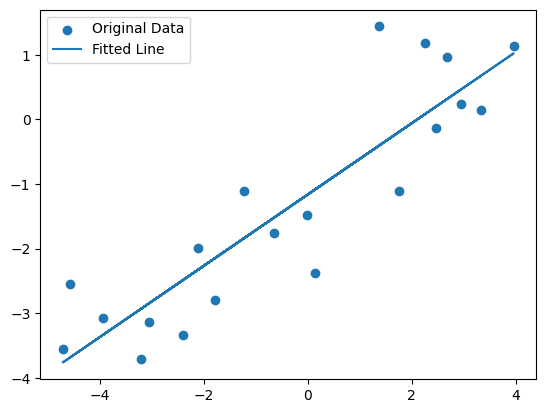

In [39]:
# plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(x=X, y=Y, label="Original Data")
plt.plot(X, predicted, label="Fitted Line")
plt.legend()
plt.show()